In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random

path = "./model_results/32g__u_more_1/"
y_label = "failure_rate"   
output_file = f"./model_results/{path[16:len(path)-1]}_{y_label}.csv"

# plot_parameters = {"x_label" : "n_tasks", 
#                    "var_values" : [("u_tot", 1.0), ("u_tot", 1.1), ("u_tot", 1.2)], 
#                     "fixed_value" : ("u_mem", 0.0)}

remove_heur2 = False

plot_parameters = {"x_label" : "u_tot", 
                   "var_values" : [("n_tasks", 16), ("n_tasks", 32)], 
                    "fixed_value" : ("u_mem", 0.0)}

# plot_parameters = {"x_label" : "u_tot", 
#                    "var_values" : [("u_mem", 0.05), ("u_mem", 0.15),("u_mem",0.35), ("u_mem", 0.45)], 
#                     "fixed_value" : ("n_tasks", 32)}

 

files = [[pd.read_csv(path+f,  sep = "\t"), f.split("_")[-1]] for f in os.listdir(path) if "raw" not in f and (not remove_heur2 or "heur2" not in f)]
for i in range (0, len(files)) : 
    print(files[i][1])


model.log
heur1.log
heur2.log


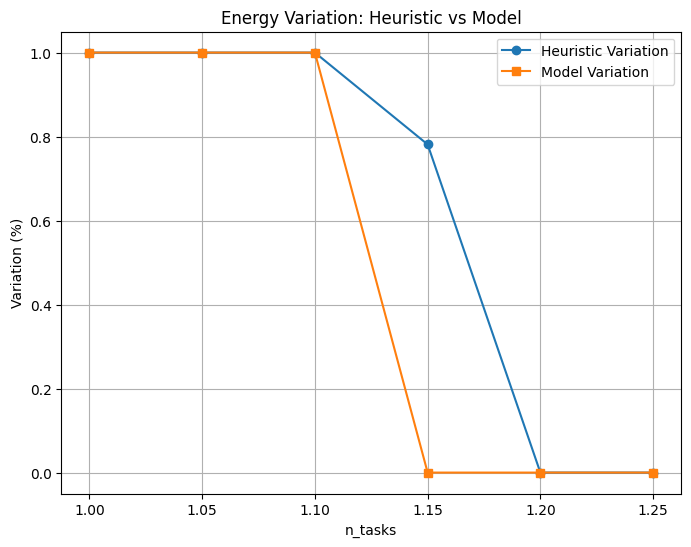

In [10]:


def extract_data(data, x_label, fixed_val1, fixed_val2, y_label) : 

    label1, val1 = fixed_val1
    label2, val2 = fixed_val2
    x_val = np.array([
    float(data[x_label][i])
    for i in range(len(data[x_label])) 
    if round(data[label1][i], 2) == val1 and round(data[label2][i], 2) == val2 and data[y_label][i] != 'ONLY failure'
    ])
    y_val = np.array([
    float(data[y_label][i] if y_label != "failure_rate" else float(data[y_label][i].split('/')[0])/float(data[y_label][i].split('/')[1]) )
    for i in range(len(data[x_label])) 
    if round(data[label1][i], 2) == val1 and round(data[label2][i], 2) == val2 and data[y_label][i] != 'ONLY failure'
    ])

    return(x_val, y_val)

x, y = extract_data(files[0][0], plot_parameters["x_label"], plot_parameters["var_values"][0], plot_parameters["fixed_value"], y_label)
if y_label == "energy" : 
    n_tasks, energy_init = extract_data(files[0][0], plot_parameters["x_label"], plot_parameters["var_values"][0], plot_parameters["fixed_value"], "energy_init")
    heur_var = (energy_init-y)*100/energy_init
else : 
    heur_var = y

x, y = extract_data(files[-1][0], plot_parameters["x_label"], plot_parameters["var_values"][0], plot_parameters["fixed_value"], y_label)
if y_label == "energy" : 
    n_tasks, energy_init = extract_data(files[-1][0], plot_parameters["x_label"], plot_parameters["var_values"][0], plot_parameters["fixed_value"], "energy_init")
    model_var = (energy_init-y)*100/energy_init
else : 
    model_var = y

# Plotting the variations
plt.figure(figsize=(8, 6))
plt.xlabel("n_tasks")
plt.ylabel("Variation (%)")
plt.plot(x, heur_var, marker="o", label="Heuristic Variation")
plt.plot(x, model_var, marker="s", label="Model Variation")
plt.title("Energy Variation: Heuristic vs Model")
plt.legend()
plt.grid(True)
plt.show()

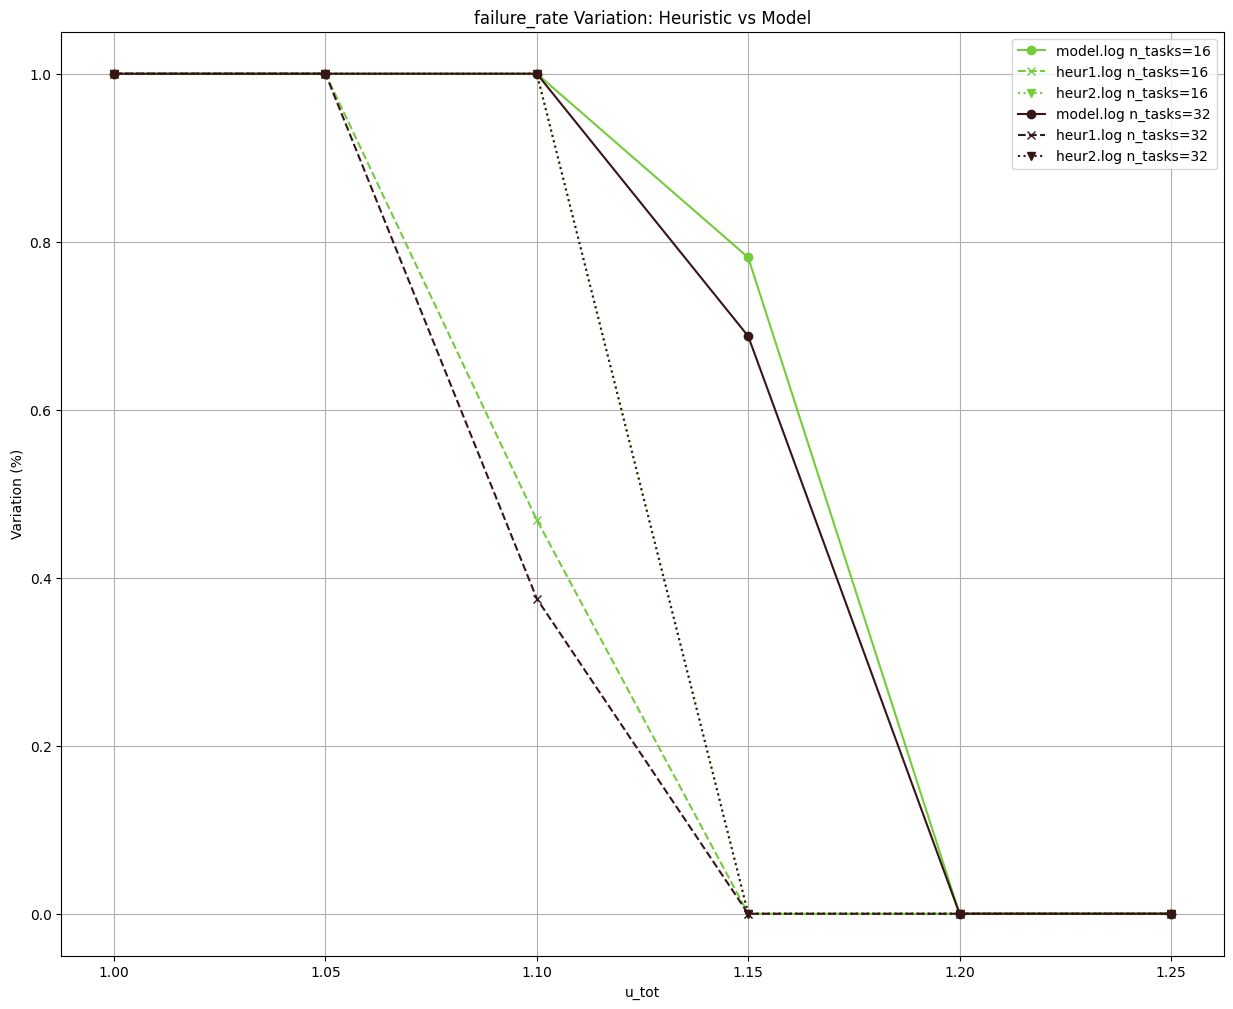

In [11]:

def plot_energy_var(data_list, plot_parameters) :
    x_label = plot_parameters["x_label"]
    var_values = plot_parameters["var_values"]
    fixed_val = plot_parameters["fixed_value"] 
    plt.figure(figsize=(15, 12))
    plt.xlabel(x_label)
    plt.ylabel("Variation (%)")
    styles = ['-', '--', ':']
    markers = ['o', 'x', 'v']
    for i,v in enumerate(var_values) : 
        color = np.random.rand(3,)
        for j,data in enumerate(data_list) :
            style = styles[j]
            marker = markers[j]
            x, energy = extract_data(data[0], x_label, v, fixed_val, "energy")
            x, energy_init = extract_data(data[0], x_label, v, fixed_val, "energy_init")
            variation = ((energy_init-energy)*100/energy_init)
            plt.plot(x, variation ,style, marker=marker, color=color, label=f"{data[1]} {v[0]}={v[1]}")

    # Plotting the variations
    plt.title("Energy Variation: Heuristic vs Model")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

def plot_something_else(data_list, plot_parameters, y_label) : 
    x_label = plot_parameters["x_label"]
    var_values = plot_parameters["var_values"]
    fixed_val = plot_parameters["fixed_value"] 
    plt.figure(figsize=(15, 12))
    plt.xlabel(x_label)
    plt.ylabel("Variation (%)")
    styles = ['-', '--', ':']
    markers = ['o', 'x', 'v']
    for i,v in enumerate(var_values) : 
        color = np.random.rand(3,)
        for j,data in enumerate(data_list) :
            style = styles[j]
            marker = markers[j]
            x, y = extract_data(data[0], x_label, v, fixed_val, y_label)
            plt.plot(x, y ,style, marker=marker, color=color, label=f"{data[1]} {v[0]}={v[1]}")

    # Plotting the variations
    plt.title(f"{y_label} Variation: Heuristic vs Model")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

if y_label == "energy" : 
    plot_energy_var(files, plot_parameters)
else : 
    plot_something_else(files, plot_parameters, y_label)

In [12]:
import csv


def save_energy_var(data_list, plot_parameters, output_file) : 
    x_label = plot_parameters["x_label"]
    var_values = plot_parameters["var_values"]
    fixed_val = plot_parameters["fixed_value"] 
    # Data for CSV
    csv_data = []
    for v in var_values : 
        for data in data_list : 

            x_vals, energy = extract_data(data[0], x_label, v, fixed_val, "energy")
            _, energy_init = extract_data(data[0], x_label, v, fixed_val, "energy_init")
            variation = ((energy_init-energy)*100/energy_init)
                        
            # Add data to CSV structure
            if not csv_data:  # Initialize csv_data with utilization and empty columns
                csv_data = [[x.round(3)] for x in x_vals]
            
            for i, k in enumerate(variation) : 
                csv_data[i].append(k)


    # Write data to CSV

    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Header
        row = [f"{x_label}"] + [item for v in var_values for item in [f"{data[1]}_res_{v[0]}_{v[1]}" for data in data_list]]
        writer.writerow(row)
        print(row)
        # Rows
        writer.writerows(csv_data)



def save_var(data_list, plot_parameters, output_file, y_label) : 
    x_label = plot_parameters["x_label"]
    var_values = plot_parameters["var_values"]
    fixed_val = plot_parameters["fixed_value"] 
    # Data for CSV
    csv_data = []
    for v in var_values : 
        for data in data_list : 

            x_vals, y_vals = extract_data(data[0], x_label, v, fixed_val, y_label)
                        
            # Add data to CSV structure
            if not csv_data:  # Initialize csv_data with utilization and empty columns
                csv_data = [[x.round(3)] for x in x_vals]
            
            for i, y in enumerate(y_vals) : 
                csv_data[i].append(y.round(3))


    # Write data to CSV

    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Header
        row = [f"{x_label}"] + [item for v in var_values for item in [f"{data[1]}_res_{v[0]}_{v[1]}" for data in data_list]]
        print(row)
        writer.writerow(row)
        # Rows
        writer.writerows(csv_data)

if y_label == "energy" : 
    save_energy_var(files, plot_parameters, output_file) 
else : 
    save_var(files, plot_parameters, output_file, y_label)

['u_tot', 'model.log_res_n_tasks_16', 'heur1.log_res_n_tasks_16', 'heur2.log_res_n_tasks_16', 'model.log_res_n_tasks_32', 'heur1.log_res_n_tasks_32', 'heur2.log_res_n_tasks_32']
